In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
player_stats_dataset = pd.read_csv("final_data.csv")
player_stats = player_stats_dataset.iloc[:, 77:89]
pld = np.nan_to_num(player_stats)
print(pld.shape)


(6353, 12)


In [4]:
player_stats.describe()

,heights,weights,hands,age,arm,40_dash,vertical,bench,shuttle,broad,3_cone,60_shuttle
count,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000
mean,73.772523,241.501810,9.544379,22.730826,32.307667,4.803199,32.389797,19.479225,4.378654,112.978128,7.319070,11.678663
std,2.655675,45.172072,0.451016,0.829741,1.198409,0.299144,4.008625,6.018065,0.244688,8.784403,0.388398,0.244747
min,64.900000,142.000000,7.130000,19.523288,27.130000,4.210000,19.000000,1.000000,3.730000,8.000000,6.380000,10.580000
25%,71.900000,204.000000,9.250000,22.197260,31.425782,4.567729,29.500000,14.915584,4.200000,107.000000,7.042195,11.498525
50%,74.000000,235.000000,9.575972,22.739726,32.250000,4.730000,32.581967,19.000000,4.320000,114.000000,7.245244,11.620000
75%,75.800000,277.000000,9.818837,23.246575,33.423852,5.010000,35.000000,23.160000,4.530000,118.962868,7.540000,11.871250
max,81.630000,387.000000,11.750000,28.553425,38.500000,5.850000,46.000000,49.000000,5.400000,147.000000,9.280000,13.340000


In [5]:
player_stats.columns

Index(['heights', 'weights', 'hands', 'age', 'arm', '40_dash', 'vertical',
       'bench', 'shuttle', 'broad', '3_cone', '60_shuttle'],
      dtype='object')

In [ ]:
# Perform K-means on our data (Train centroids)
kmeans = KMeans(n_clusters=4,
                n_init=2,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=False).fit(pld)

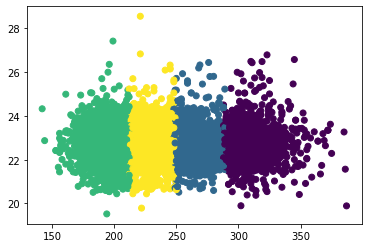

In [ ]:
plt.scatter(pld[:,1], pld[:,3], c=kmeans.labels_)

[0.7784431137724551, 0.01102629346904156, 0.38431752178121975, 0.039473684210526314, 0.8282051282051283, 0, 0.011750881316098707, 0.08695652173913043, 0, 0.010719754977029096, 0.4887640449438202, 0, 0.012547051442910916]
['C' 'DB' 'DE' 'FB' 'G' 'K' 'LB' 'P' 'QB' 'RB' 'T' 'TE' 'WR']
[0.17964071856287425, 0.006785411365564037, 0.510164569215876, 0.27631578947368424, 0.14358974358974358, 0.03333333333333333, 0.18331374853113983, 0, 0.034482758620689655, 0.039816232771822356, 0.33146067415730335, 0.3333333333333333, 0.0075282308657465494]
['C' 'DB' 'DE' 'FB' 'G' 'K' 'LB' 'P' 'QB' 'RB' 'T' 'TE' 'WR']
[0.029940119760479042, 0.8693808312128923, 0.03581800580832527, 0.06578947368421052, 0.015384615384615385, 0.8333333333333334, 0.025851938895417155, 0.43478260869565216, 0.28735632183908044, 0.43644716692189894, 0.016853932584269662, 0, 0.8055207026348808]
['C' 'DB' 'DE' 'FB' 'G' 'K' 'LB' 'P' 'QB' 'RB' 'T' 'TE' 'WR']
[0.011976047904191617, 0.11280746395250212, 0.0696999031945789, 0.618421052631

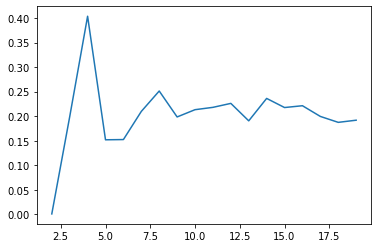

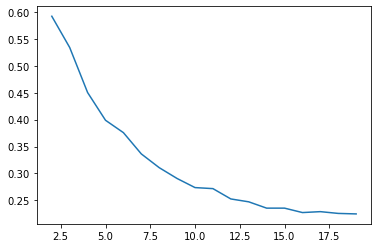

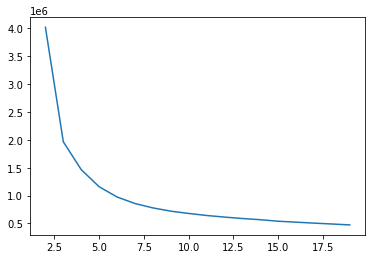

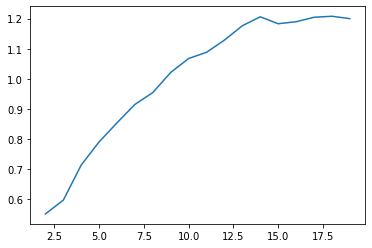

In [ ]:
sums = []
scores = []
inertias = []
bouldin = []
cluster_values = range(2, 20)
for n in cluster_values:
    kmeans = KMeans(n_clusters=n,
                    n_init=2,
                    init='random',
                    tol=1e-4, 
                    random_state=170,
                    verbose=False).fit(pld)
    player_positions = player_stats_dataset.iloc[:, 4]
    pld_2 = np.nan_to_num(player_positions)
    unique_2,indices_2 = np.unique(pld_2,return_inverse=True)
    counts_2 = np.bincount(indices_2)
    player_positions.describe()
    combo = np.vstack((pld_2, kmeans.labels_))
    combo = np.transpose(combo)
    sum = 0
    for i in range(1, n):
        combo_next = combo[combo[:, 1] == i]
        unique,indices = np.unique(combo_next[:, 0],return_inverse=True)
        counts = np.bincount(indices)
        actual_counts = []
        for position_name in unique_2:
            if position_name in unique:
                temp_counts = counts[unique==position_name]
                total_counts = counts_2[unique_2==position_name]
                actual_counts.append(int(temp_counts)/int(total_counts))
            else:
                actual_counts.append(0)
        position_best = actual_counts.index(max(actual_counts))  
        recall = actual_counts[position_best]
        precision = counts[unique == unique_2[position_best]]/np.sum(counts)
        F_measure = 2/((1/recall)+(1/precision))
        sum = F_measure + sum
    sums.append(sum/(i+1))
    scores.append(silhouette_score(pld, kmeans.labels_, metric='euclidean'))
    inertias.append(kmeans.inertia_)
    bouldin.append(davies_bouldin_score(pld, kmeans.labels_))

plt.figure()
plt.plot(cluster_values, sums)
plt.figure()
plt.plot(cluster_values, scores)
plt.figure()
plt.plot(cluster_values, inertias)
plt.figure()
plt.plot(cluster_values, bouldin) 

kmeans = KMeans(n_clusters=4,
                    n_init=2,
                    init='random',
                    tol=1e-4, 
                    random_state=170,
                    verbose=False).fit(pld)
player_positions = player_stats_dataset.iloc[:, 4]
pld_2 = np.nan_to_num(player_positions)
unique_2,indices_2 = np.unique(pld_2,return_inverse=True)
counts_2 = np.bincount(indices_2)
player_positions.describe()
combo = np.vstack((pld_2, kmeans.labels_))
combo = np.transpose(combo)
sum = 0
for i in range(0, 4):
    combo_next = combo[combo[:, 1] == i]
    unique,indices = np.unique(combo_next[:, 0],return_inverse=True)
    counts = np.bincount(indices)
    actual_counts = []
    for position_name in unique_2:
        if position_name in unique:
            temp_counts = counts[unique==position_name]
            total_counts = counts_2[unique_2==position_name]
            actual_counts.append(int(temp_counts)/int(total_counts))
        else:
            actual_counts.append(0)
    position_best = actual_counts.index(max(actual_counts)) 
    print(actual_counts)
    print(unique_2)